In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataset_train = pd.read_csv('/content/Google_Stock_Price_Test.csv')
dataset_train.head()
#print(dataset_train)
train = dataset_train.loc[:, ["Open"]].values
print(train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
print(train_scaled)
#plt.plot(train_scaled)
#plt.show()
X_train = []
y_train = []
timesteps = 19
for i in range(timesteps,len(train_scaled)):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print("yy",y_train)
print("X_train shape before reshaping:", X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 42)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
[[0.        ]
 [0.16186441]
 [0.12322034]
 [0.27881356]
 [0.46762712]
 [0.49237288]
 [0.44389831]
 [0.48016949]
 [0.4859322 ]
 [0.47915254]
 [0.45762712]
 [0.4459322 ]
 [0.47627119]
 [0.4820339 ]
 [0.73711864]
 [0.86118644]
 [1.        ]
 [0.94745763]
 [0.60762712]
 [0.3059322 ]]
yy [0.3059322]
X_train shape before reshaping: (1, 19)
Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 3.5641
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 1.1497
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6448
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0103
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0106
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss

1/1 [==============================] - 0s 443ms/step


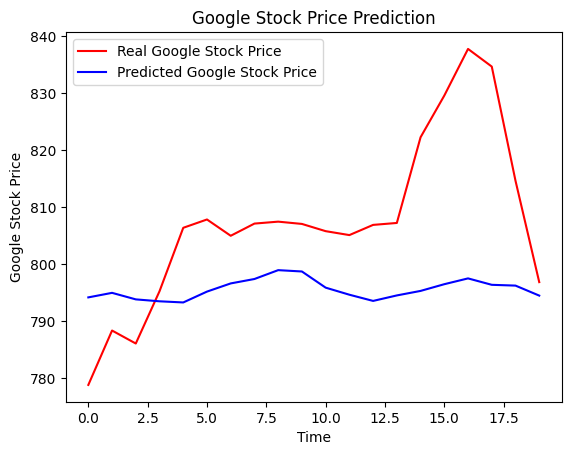

In [ ]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
dataset_test.head()
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
inputs
X_test = []
for i in range(timesteps,len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
dataset_train = pd.read_csv('/content/Google_Stock_Price_Test.csv')

# Check the shape and content of the dataset
print(dataset_train.head())
print("Dataset shape:", dataset_train.shape)

# Extract the 'Open' column for training
train = dataset_train.loc[:, ["Open"]].values
print("Train data shape:", train.shape)

# Scale the training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
print("Scaled train data shape:", train_scaled.shape)

# Prepare the training data
X_train = []
y_train = []
timesteps = 15

# Check the total number of records to ensure enough data points
total_records = train_scaled.shape[0]
print("Total records:", total_records)

# Ensure enough data points to create sequences of desired length
if total_records <= timesteps:
    raise ValueError("Not enough data points to create sequences of length {}.".format(timesteps))

# Populate X_train and y_train
for i in range(timesteps, total_records):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print("X_train shape before reshaping:", X_train.shape)

# Reshape the training data to be suitable for RNN input
# Ensure that the dimensions match the expected shape (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("Reshaped X_train shape:", X_train.shape)

# Import necessary modules from keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Initialize the RNN
regressor = Sequential()

# Add the first RNN layer with Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Add the second RNN layer with Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Add the third RNN layer with Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Add the fourth RNN layer
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units=1))

# Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400
Dataset shape: (20, 6)
Train data shape: (20, 1)
Scaled train data shape: (20, 1)
Total records: 20
X_train shape before reshaping: (5, 15)
Reshaped X_train shape: (5, 15, 1)
Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.6657
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1449
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 1.1761
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6784
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6479
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 1.7836
Epoch 7/100
1/1 [======